# Testing rasterio 

Testing rasterio and image processing in order to split .TIF raster datasets into multiple JPG color images

importing required python packages

In [13]:
import os
import numpy as np
import rasterio
from rasterio.windows import Window
from PIL import Image

Chat-gtp generated code (doesnt work propertly) :(

In [15]:
# Example usage:
input_raster = "raster_conaf/AguaSalada1.tif"
target_size = (256, 256)

From a TIF file generates multiples .jpg files

In [48]:
import os
import shutil
import rasterio as rio
from PIL import Image

# Define the input path and filename for the source raster
in_path = 'raster_conaf'
input_filename = 'AguaSalada1.tif'

# Define the output path and filename template for the generated JPG files
out_path = 'hola'
output_filename = 'tile_{}-{}.jpg'

# Threshold for considering an image as having a "large" black region
black_pixel_threshold = 0.0075  # Adjust as needed (0.0 to 1.0)

# Function to delete images with a large black region
def delete_images_with_large_black_regions(input_directory, threshold):
    # Create the "black" directory if it doesn't exist
    black_directory = os.path.join(input_directory, 'black')
    os.makedirs(black_directory, exist_ok=True)

    # Iterate through each image and delete if it has a large black region
    for image_file in os.listdir(input_directory):
        if image_file.endswith(('.jpg', '.png', '.jpeg')):
            image_path = os.path.join(input_directory, image_file)

            # Open the image using Pillow (PIL)
            img = Image.open(image_path).convert('L')  # Convert to grayscale

            # Calculate the percentage of black pixels in the image
            total_pixels = img.size[0] * img.size[1]
            black_pixels = sum(1 for pixel in img.getdata() if pixel == 0)
            black_pixel_percentage = black_pixels / total_pixels

            # Check if the black pixel percentage exceeds the threshold
            if black_pixel_percentage >= threshold:
                # Move the image to the "black" directory
                shutil.move(image_path, os.path.join(black_directory, image_file))
                print(f"Image '{image_path}' has a large black region and has been deleted.")

# Open the source raster dataset
with rio.open(os.path.join(in_path, input_filename)) as inds:
    tile_width, tile_height = 256, 256

    # Calculate the number of rows and columns for tiles
    num_cols = (inds.width + tile_width - 1) // tile_width
    num_rows = (inds.height + tile_height - 1) // tile_height

    for col in range(num_cols):
        for row in range(num_rows):
            # Calculate window coordinates
            window = rio.windows.Window(col * tile_width, row * tile_height, tile_width, tile_height)

            # Read the tile data for all bands (assuming they are RGB)
            tile_data = inds.read(window=window)

            # Create an output RGB image using Pillow (PIL)
            rgb_image = Image.merge('RGB', [Image.fromarray(band) for band in tile_data[:3]])  # Use the first three bands (R, G, B)

            # Save the RGB image as a JPG file
            jpg_path = os.path.join(out_path, output_filename.format(col, row))
            rgb_image.save(jpg_path)

# Call the function to delete images with black regions after processing all tiles
delete_images_with_large_black_regions(out_path, black_pixel_threshold)

# Print a message indicating that the tiles have been successfully converted to JPG
print("Tiles converted to RGB JPG and images with large black regions deleted successfully!")


Image 'output/tile_11520-1536.jpg' has a large black region and has been renamed to 'tile_11520-1536_1.jpg'.
Image 'output/tile_4096-13312.jpg' has a large black region and has been renamed to 'tile_4096-13312_1.jpg'.
Image 'output/tile_4352-3072.jpg' has a large black region and has been renamed to 'tile_4352-3072_1.jpg'.
Image 'output/tile_18944-7936.jpg' has a large black region and has been renamed to 'tile_18944-7936_1.jpg'.
Image 'output/tile_13824-14848.jpg' has a large black region and has been renamed to 'tile_13824-14848_1.jpg'.
Image 'output/tile_512-7680.jpg' has a large black region and has been renamed to 'tile_512-7680_1.jpg'.
Image 'output/tile_3072-12544.jpg' has a large black region and has been renamed to 'tile_3072-12544_1.jpg'.
Image 'output/tile_18688-7680.jpg' has a large black region and has been renamed to 'tile_18688-7680_1.jpg'.
Image 'output/tile_7424-256.jpg' has a large black region and has been renamed to 'tile_7424-256_1.jpg'.
Image 'output/tile_16384-13

Display some random images

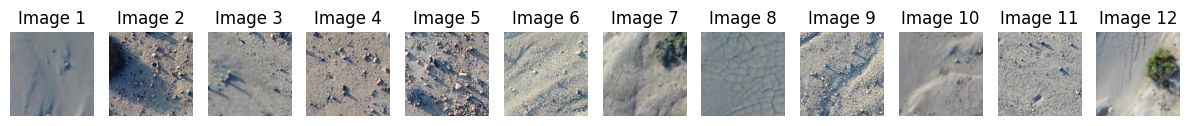

In [43]:
import os
import random
import matplotlib.pyplot as plt
from PIL import Image

# Set the directory where your images are stored
image_dir = 'hola'

# Set the number of random images you want to display
num_images_to_display = 12

# Get a list of all image files in the directory
image_files = [f for f in os.listdir(image_dir) if f.endswith(('.jpg', '.jpeg', '.png', '.gif', '.bmp'))]

# Randomly select 'num_images_to_display' images
selected_images = random.sample(image_files, num_images_to_display)

# Create a Matplotlib figure and axis
fig, axes = plt.subplots(1, num_images_to_display, figsize=(12, 4))

# Loop through selected images and display them
for i, image_file in enumerate(selected_images):
    # Load and display each image
    img_path = os.path.join(image_dir, image_file)
    img = Image.open(img_path)
    axes[i].imshow(img)
    axes[i].set_title(f"Image {i+1}")
    axes[i].axis('off')

plt.tight_layout()
plt.show()